In [49]:
# importing libraries
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import os
import seaborn as sns 

In [83]:
Test_files = []
for dirname, _, filenames in os.walk('data/test'):
    for filename in filenames:
        df_path = os.path.join(dirname, filename)
        if 'test' in df_path:
            Test_files.append(pd.read_csv(df_path))

df_test = pd.concat(Test_files)
x_finaltest = df_train.iloc[:,:-1]
y_finaltest = df_train.iloc[:,-1:]

print("df_test")
df_test

df_test


,x,y,z,010-000-024-033,010-000-030-096,020-000-032-221,020-000-033-111,anomaly
0,6.912997,11.518698,15.471855,0.0,0.0,0.0,1.0,0.0
1,6.936432,11.574586,15.446939,0.0,0.0,1.0,0.0,0.0
2,6.935274,11.571790,15.437505,1.0,0.0,0.0,0.0,0.0
3,6.886688,11.561593,15.704019,0.0,0.0,0.0,1.0,0.0
4,6.921823,11.597728,15.634435,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5924,10.383055,14.496050,10.680593,1.0,0.0,0.0,0.0,0.0
5925,10.465170,14.492795,10.830136,0.0,0.0,1.0,0.0,0.0
5926,10.431776,14.499866,10.618680,0.0,1.0,0.0,0.0,0.0
5927,10.401590,14.455318,10.952165,0.0,0.0,0.0,1.0,0.0


In [50]:
for dirname, _, filenames in os.walk('data/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/train\data_0.csv
data/train\data_1.csv
data/train\data_10.csv
data/train\data_11.csv
data/train\data_12.csv
data/train\data_13.csv
data/train\data_14.csv
data/train\data_15.csv
data/train\data_16.csv
data/train\data_17.csv
data/train\data_18.csv
data/train\data_19.csv
data/train\data_2.csv
data/train\data_3.csv
data/train\data_4.csv
data/train\data_5.csv
data/train\data_6.csv
data/train\data_7.csv
data/train\data_8.csv
data/train\data_9.csv


In [51]:
training_files = []
for dirname, _, filenames in os.walk('data/train'):
    for filename in filenames:
        
        df_path = os.path.join(dirname, filename)
        if 'train' in df_path:
            training_files.append(pd.read_csv(df_path))

df_train = pd.concat(training_files)

In [52]:
df_train.head()

,x,y,z,010-000-024-033,010-000-030-096,020-000-032-221,020-000-033-111,anomaly
0,18.495860,13.766527,14.362624,0.0,0.0,0.0,1.0,0.0
1,18.501072,13.827225,14.270268,0.0,0.0,1.0,0.0,0.0
2,18.405950,13.868976,14.094804,1.0,0.0,0.0,0.0,0.0
3,18.444572,13.910701,14.116078,0.0,1.0,0.0,0.0,0.0
4,18.418470,13.933917,14.320566,0.0,0.0,0.0,1.0,0.0


<Axes: xlabel='anomaly', ylabel='count'>

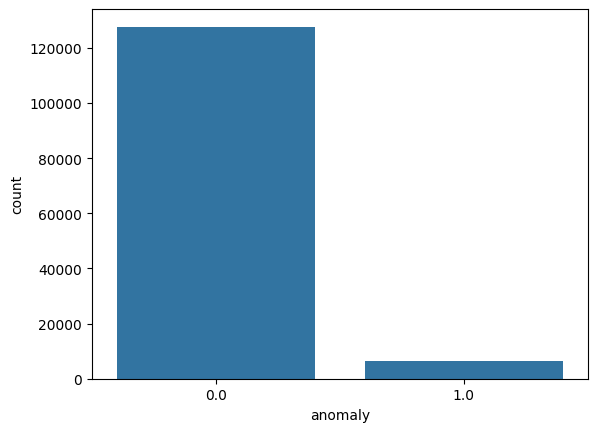

In [53]:
sns.countplot(x=df_train['anomaly'])

<Axes: >

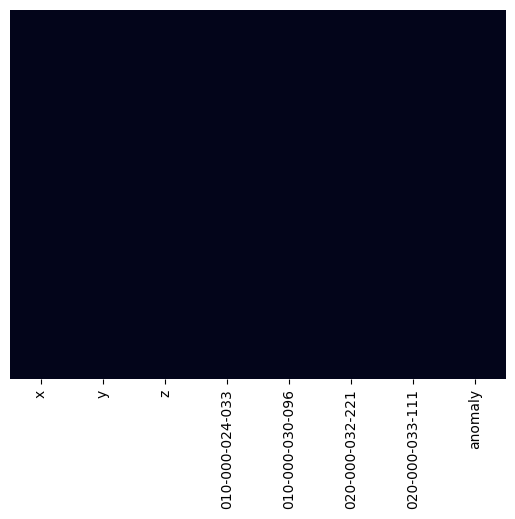

In [54]:
sns.heatmap(df_train.isna(), yticklabels=False, cbar=False)

In [55]:
df_train.isnull().sum()

x                  0
y                  0
z                  0
010-000-024-033    0
010-000-030-096    0
020-000-032-221    0
020-000-033-111    0
anomaly            0
dtype: int64

In [56]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
x,134229.0,13.189512,3.868037,4.077736,9.676778,13.701333,16.345594,24.360715
y,134229.0,12.184366,2.705422,6.042775,10.162940,11.625925,14.277065,19.633268
z,134229.0,11.383458,2.018636,4.600291,9.975850,11.344621,12.933669,16.296521
010-000-024-033,134229.0,0.258551,0.437840,0.000000,0.000000,0.000000,1.000000,1.000000
010-000-030-096,134229.0,0.257962,0.437515,0.000000,0.000000,0.000000,1.000000,1.000000
020-000-032-221,134229.0,0.260964,0.439162,0.000000,0.000000,0.000000,1.000000,1.000000
020-000-033-111,134229.0,0.222523,0.415942,0.000000,0.000000,0.000000,0.000000,1.000000
anomaly,134229.0,0.048969,0.215803,0.000000,0.000000,0.000000,0.000000,1.000000


In [58]:
df_train['anomaly'].value_counts()

anomaly
0.0    127656
1.0      6573
Name: count, dtype: int64

In [59]:
# checking existing duplicate values in data
number_of_duplicate_rows = len(df_train) - len(df_train.drop_duplicates())
number_of_duplicate_rows

0

In [86]:
#split the data set to target value Y and the dataset and feature X
x = df_train.iloc[:,:-1]
y= df_train.iloc[:,-1:]
x.head()

,x,y,z,010-000-024-033,010-000-030-096,020-000-032-221,020-000-033-111
0,18.495860,13.766527,14.362624,0.0,0.0,0.0,1.0
1,18.501072,13.827225,14.270268,0.0,0.0,1.0,0.0
2,18.405950,13.868976,14.094804,1.0,0.0,0.0,0.0
3,18.444572,13.910701,14.116078,0.0,1.0,0.0,0.0
4,18.418470,13.933917,14.320566,0.0,0.0,0.0,1.0


## With smoth

In [62]:
# apply SMOTE to the dataset
smote = SMOTE(random_state=42)
x_smothed, y_smothed = smote.fit_resample(x, y)

<Axes: xlabel='anomaly', ylabel='count'>

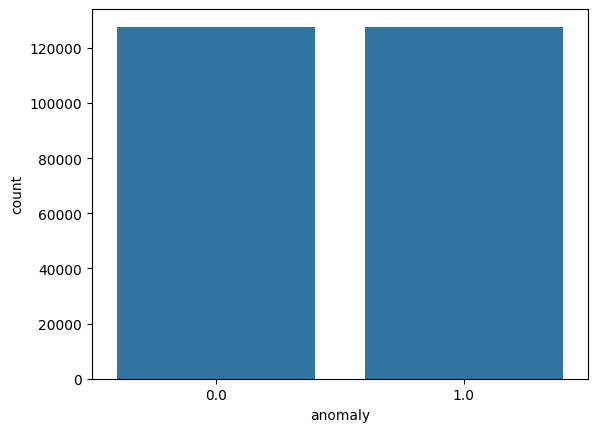

In [63]:
sns.countplot(x=y_smothed['anomaly'])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(x_smothed, y_smothed, test_size=0.2, random_state=42)

In [65]:
# initialize a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training data
rf.fit(X_train, y_train)

# evaluate the model on the test data
accuracy = rf.score(X_test, y_test)

C:\Users\hesam\AppData\Local\Temp\ipykernel_5892\3551062007.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [66]:
print("RandomForest accuracy with smothing dataset:",accuracy)

RandomForest accuracy with smothing dataset: 0.9693320016450268


Test


In [85]:
accuracy_test = rf.score(x_finaltest, y_finaltest)
print("randomForest accuracy final test with smothing",accuracy_test)

randomForest accuracy final test with smothing 0.9909185049430451


## without smothing

<Axes: xlabel='anomaly', ylabel='count'>

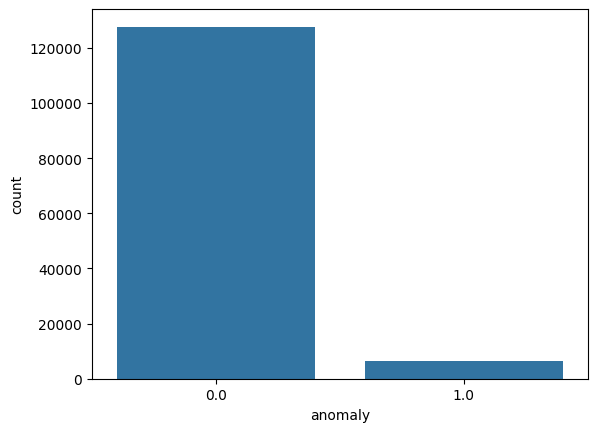

In [88]:
sns.countplot(x=y['anomaly'])

In [89]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [90]:
# initialize a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training data
rf.fit(X_train, y_train)

# evaluate the model on the test data
accuracy = rf.score(X_test, y_test)

print("RandomForest accuracy:",accuracy)

C:\Users\hesam\AppData\Local\Temp\ipykernel_5892\3257015554.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForest accuracy: 0.9653207181703047


In [91]:
accuracy_test = rf.score(x_finaltest, y_finaltest)
print("randomForest accuracy final test",accuracy_test)

randomForest accuracy final test 0.9930417420974603


## Random Forest with Grid Search

In [92]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

# Perform Grid Search (hyperparameter tuning)
grid_search.fit(X_train, y_train)

# Get best estimator
best_rf = grid_search.best_estimator_

# Use best estimator for prediction and evaluation
y_pred = best_rf.predict(X_test)
accuracy = best_rf.score(X_test, y_test)

print("Best Parameters:", grid_search.best_params_)
print("Predictions:", y_pred)
print("Accuracy:", accuracy)

c:\Users\hesam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\hesam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\hesam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\hesam\AppData\Local\Programs\Py

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Predictions: [0. 0. 0. ... 0. 0. 0.]
Accuracy: 0.9653579676674365
